# IMMC 2022 International

## Data and Visuallization

In [1]:
import pandas as pd
import numpy as np
import math
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie, Line, Page
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
from shapely.geometry import *
from shapely import affinity
import geopandas as gpd
import random
import operator

%matplotlib inline

In [450]:
color = ["green", "orange", "red"]

In [173]:
p = 189
plane = [
    [2 for i in range(0, p)] + [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [0 for i in range(0, p)] + [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2],
    [2 for i in range(0, p)] + [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]
x_min = -p
x_max = 33
x_delta = -x_min # = p
y_min = -4
y_max = 4
y_delta = -y_min

In [159]:
p = 318
plane = [
    [2 for i in range(p)] + [2 for i in range(30)],
    [0 for i in range(p)] + [0 for i in range(26)] + [2 for i in range(4)],
    [2 for i in range(p)] + [2 for i in range(4)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [2 for i in range(4)],
    [2 for i in range(p)] + [2 for i in range(4)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [2 for i in range(4)],
    [2 for i in range(p)] + [2 for i in range(4)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [2 for i in range(4)],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2] + [1 for i in range(3)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(6)] + [0] + [1 for i in range(3)] + [2],
    [2 for i in range(p)] + [2 for i in range(30)]
]
x_min = -p
x_max = 40
x_delta = -x_min
y_min = -1
y_max = 15
y_delta = -y_min

In [368]:
# p = 18 + 246
p = 0
plane = [
    [2 for i in range(4)] + [0] + [2 for i in range(36)] + [0] + [2],
    [2] + [1 for i in range(3)] + [0] + [1 for i in range(36)] + [0] + [2],
    [2] + [1 for i in range(3)] + [0] + [1 for i in range(36)] + [0] + [2],
    [2] + [0 for i in range(41)] + [2],
    [2] + [1 for i in range(3)] + [0] + [1 for i in range(13)] + [2 for i in range(2)] + [1 for i in range(21)] + [0] + [2],
    [2] + [2 for i in range(3)] + [0] + [1 for i in range(13)] + [2 for i in range(2)] + [1 for i in range(21)] + [0] + [2],
    [2] + [1 for i in range(3)] + [0] + [1 for i in range(13)] + [2 for i in range(2)] + [1 for i in range(21)] + [0] + [2],
    [2] + [0 for i in range(41)] + [2],
    [2] + [1 for i in range(3)] + [2] + [1 for i in range(36)] + [2 for i in range(2)],
    [2] + [1 for i in range(3)] + [2] + [1 for i in range(36)] + [2 for i in range(2)],
    [2 for i in range(43)]
]
x_min = -4
x_max = 38
x_delta = -x_min
y_min = 0
y_max = 10
y_delta = -y_min

In [369]:
def createPlane(includeWalls = True, includeLine = False, drawType = 0):
    
    polygons = []
    
    ymin = y_min + y_delta
    ymax = y_max + y_delta + 1
    xmin = x_min + x_delta
    xmax = x_max + x_delta + 1
    
    if not includeLine:
        xmin += p
    
    for i in range(ymin, ymax):
        for j in range(xmin, xmax):
            if plane[i][j] == drawType:
                ri = i - y_delta
                rj = j - x_delta
                ext = [[(rj - 0.5, ri - 0.5), (rj - 0.5, ri + 0.5), (rj + 0.5, ri + 0.5), (rj + 0.5, ri - 0.5)], []]
                polygons.append(ext)
            
    return MultiPolygon(polygons)

In [370]:
pPlane = [_ for _ in range(3)]
pPlaneL = [_ for _ in range(3)]

In [371]:
for i in range(3):
    pPlane[i] = createPlane(drawType = i)
for i in range(3):
    pPlaneL[i] = createPlane(includeLine = True, drawType = i)

In [431]:
def draw(drawLine = False, drawPassanger = False, drawSeated = False, time = 0, saveFig = False, dataName = "", add = 0):
    fig, ax = plt.subplots(figsize = (26, 10))
    
    yrmin = y_min - 1.5
    yrmax = y_max + 1.5
    xrmin = x_min - 1.5
    xrmax = x_max + 1.5
    ticks_frequency = 5
    
    if not drawLine:
        xrmin += p
        ticks_frequency = 1
    
    if drawLine:
        for i in range(3):
            gpd.GeoSeries(pPlaneL[i]).plot(ax = ax, color = color[i], alpha = 0.5)
    else:
        for i in range(3):
            gpd.GeoSeries(pPlane[i]).plot(ax = ax, color = color[i], alpha = 0.5)
        
    if drawPassanger:
        ax.scatter(passengerList[time + add][0], passengerList[time + add][1], s = 100, c = colorList[time + add], alpha = 0.8)
        
    if drawSeated:
        ax.scatter(seatList[time + add][0], seatList[time + add][1], s = 150, c = "blue", alpha = 0.8)

    ax.set(xlim = (xrmin, xrmax), ylim = (yrmin, yrmax), aspect = 'equal')

    ax.set_xlabel('x', size = 14, labelpad = -24, x = 1.03)
    ax.set_ylabel('y', size = 14, labelpad = -21, y = 1.02, rotation = 0)

    x_ticks = np.arange(xrmin, xrmax, ticks_frequency)
    y_ticks = np.arange(yrmin, yrmax, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    ax.grid(which = 'both', color = 'black', linewidth = 2, linestyle = '-', alpha = 0.2)

    ax.plot([xrmin, xrmax], [0, 0], c = "black", linewidth = 2.5, alpha = 0.75)
    ax.plot([0, 0], [yrmin, yrmax], c = "black", linewidth = 2.5, alpha = 0.75)

    arrow_fmt = dict(markersize = 8, color='black', clip_on = False)
    ax.plot((xrmax), (0), marker = '>', **arrow_fmt)
    ax.plot((0), (yrmax), marker = '^', **arrow_fmt)
    ax.plot((xrmin), (0), marker = '<', **arrow_fmt)
    ax.plot((0), (yrmin), marker = 'v', **arrow_fmt)
    
    if saveFig:
        plt.savefig('./' + 'output_maps_' + dataName + '/'  + str(time + add) + '.jpg')
    else:    
        plt.show()
        
    plt.cla()
    plt.clf()
    plt.close(fig)

In [8]:
class Passenger:
    uuid = 0
    location_x = 0
    location_y = 0
    destination_x = 0
    destination_y = 0
    status = 0 # 0: normal, 1: luggage, 2: change seat
    status_time = 0 
    
    def __init__(self, destination_x, destination_y, uuid):
        self.destination_x = destination_x
        self.destination_y = destination_y
        self.uuid = uuid

In [9]:
for i in range(y_min + y_delta, y_max + y_delta + 1):
    for j in range(x_min + x_delta, x_max + x_delta + 1):
        print(plane[i][j], end = ", ")
    print()

2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [38]:
passengerList = []

def init(shuffle = "random", typ = "ftb"):
    global passengerList
    passengerList = []
    uuid = 1
    
    for i in range(y_min + y_delta, y_max + y_delta + 1):
        for j in range(x_min + x_delta + p, x_max + x_delta + 1):
            if plane[i][j] == 1:
                passengerList.append(Passenger(j - p, i - y_delta, uuid))
                uuid += 1
                
    if shuffle == "random":
        random.shuffle(passengerList)
        
    if shuffle == "seat":
        passengerListFront = []
        passengerListMiddle = []
        passengerListEnd = []
        for i in passengerList:
            if i.destination_x <= 11:
                passengerListFront.append(i)
            elif i.destination_x <= 21:
                passengerListMiddle.append(i)
            else:
                passengerListEnd.append(i)
                
        random.shuffle(passengerListFront)
        random.shuffle(passengerListMiddle)
        random.shuffle(passengerListEnd)
                
        if typ == "ftb":
            passengerList = passengerListFront + passengerListMiddle + passengerListEnd
        else:
            passengerList = passengerListEnd + passengerListMiddle + passengerListFront
            
    if shuffle == "window":
        passengerListWindow = []
        passengerListMiddle = []
        passengerListAisle = []
        for i in passengerList:
            if abs(i.destination_y) == 3:
                passengerListWindow.append(i)
            elif abs(i.destination_y) == 2:
                passengerListMiddle.append(i)
            else:
                passengerListAisle.append(i)
        if typ == "random":
            random.shuffle(passengerListWindow)
            random.shuffle(passengerListMiddle)
            random.shuffle(passengerListAisle)
        else:
            passengerListWindowFront = []
            passengerListWindowMiddle = []
            passengerListWindowBack = []
            passengerListMiddleFront = []
            passengerListMiddleMiddle = []
            passengerListMiddleBack = []
            passengerListAisleFront = []
            passengerListAisleMiddle = []
            passengerListAisleBack = []
            
            for i in passengerListWindow:
                if i.destination_x <= 11:
                    passengerListWindowFront.append(i)
                elif i.destination_x <= 21:
                    passengerListWindowMiddle.append(i)
                else:
                    passengerListWindowBack.append(i)
                    
            for i in passengerListMiddle:
                if i.destination_x <= 11:
                    passengerListMiddleFront.append(i)
                elif i.destination_x <= 21:
                    passengerListMiddleMiddle.append(i)
                else:
                    passengerListMiddleBack.append(i)
                    
            for i in passengerListAisle:
                if i.destination_x <= 11:
                    passengerListAisleFront.append(i)
                elif i.destination_x <= 21:
                    passengerListAisleMiddle.append(i)
                else:
                    passengerListAisleBack.append(i)
            
            random.shuffle(passengerListWindowFront)
            random.shuffle(passengerListWindowMiddle)
            random.shuffle(passengerListWindowBack)
            random.shuffle(passengerListMiddleFront)
            random.shuffle(passengerListMiddleMiddle)
            random.shuffle(passengerListMiddleBack)
            random.shuffle(passengerListAisleFront)
            random.shuffle(passengerListAisleMiddle)
            random.shuffle(passengerListAisleBack)
                    
            if typ == "ftb":
                passengerListWindow = passengerListWindowFront + passengerListWindowMiddle + passengerListWindowBack
                passengerListMiddle = passengerListMiddleFront + passengerListMiddleMiddle + passengerListMiddleBack
                passengerListAisle = passengerListAisleFront + passengerListAisleMiddle + passengerListAisleBack
            
            else:
                passengerListWindow = passengerListWindowBack + passengerListWindowMiddle + passengerListWindowFront
                passengerListMiddle = passengerListMiddleBack + passengerListMiddleMiddle + passengerListMiddleFront
                passengerListAisle = passengerListAisleBack + passengerListAisleMiddle + passengerListAisleFront
        
        passengerList = passengerListWindow + passengerListMiddle + passengerListAisle
        
    if shuffle == "steffen_sub_perfect":
        passengerListWindowA = []
        passengerListWindowB = []
        passengerListMiddleA = []
        passengerListMiddleB = []
        passengerListAisleA = []
        passengerListAisleB = []
        
        for i in passengerList:
            if abs(i.destination_y) == 3:
                if i.destination_x % 2 == 0:
                    passengerListWindowA.append(i)
                else:
                    passengerListWindowB.append(i)
            elif abs(i.destination_y) == 2:
                if i.destination_x % 2 == 0:
                    passengerListMiddleA.append(i)
                else:
                    passengerListMiddleB.append(i)
            else:
                if i.destination_x % 2 == 0:
                    passengerListAisleA.append(i)
                else:
                    passengerListAisleB.append(i)
        
        passengerListWindowA.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowA.reverse()
        
        passengerListWindowB.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowB.reverse()
        
        passengerListMiddleA.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleA.reverse()
        
        passengerListMiddleB.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleB.reverse()
        
        passengerListAisleA.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleA.reverse()
        
        passengerListAisleB.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleB.reverse()
        
        passengerList = passengerListWindowA + passengerListWindowB + passengerListMiddleA + passengerListMiddleB + passengerListAisleA + passengerListAisleB
        
    if shuffle == "steffen_perfect":
        passengerListWindowA = []
        passengerListWindowB = []
        passengerListWindowC = []
        passengerListWindowD = []
        passengerListMiddleA = []
        passengerListMiddleB = []
        passengerListMiddleC = []
        passengerListMiddleD = []
        passengerListAisleA = []
        passengerListAisleB = []
        passengerListAisleC = []
        passengerListAisleD = []
        
        for i in passengerList:
            if i.destination_y == 3:
                if i.destination_x % 2 == 0:
                    passengerListWindowA.append(i)
                else:
                    passengerListWindowC.append(i)
            elif i.destination_y == -3:
                if i.destination_x % 2 == 0:
                    passengerListWindowB.append(i)
                else:
                    passengerListWindowD.append(i)
            elif i.destination_y == 2:
                if i.destination_x % 2 == 0:
                    passengerListMiddleA.append(i)
                else:
                    passengerListMiddleC.append(i)
            elif i.destination_y == -2:
                if i.destination_x % 2 == 0:
                    passengerListMiddleB.append(i)
                else:
                    passengerListMiddleD.append(i)
            elif i.destination_y == 1:
                if i.destination_x % 2 == 0:
                    passengerListAisleA.append(i)
                else:
                    passengerListAisleC.append(i)
            else:
                if i.destination_x % 2 == 0:
                    passengerListAisleB.append(i)
                else:
                    passengerListAisleD.append(i)
        
        passengerListWindowA.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowA.reverse()
        
        passengerListWindowB.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowB.reverse()
        
        passengerListWindowC.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowC.reverse()
        
        passengerListWindowD.sort(key = operator.attrgetter("destination_x"))
        passengerListWindowD.reverse()
        
        passengerListMiddleA.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleA.reverse()
        
        passengerListMiddleB.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleB.reverse()
        
        passengerListMiddleC.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleC.reverse()
        
        passengerListMiddleD.sort(key = operator.attrgetter("destination_x"))
        passengerListMiddleD.reverse()
        
        passengerListAisleA.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleA.reverse()
        
        passengerListAisleB.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleB.reverse()
        
        passengerListAisleC.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleC.reverse()
        
        passengerListAisleD.sort(key = operator.attrgetter("destination_x"))
        passengerListAisleD.reverse()
        
        passengerList = passengerListWindowA + passengerListWindowB + passengerListWindowC + passengerListWindowD
        passengerList += passengerListMiddleA + passengerListMiddleB + passengerListMiddleC + passengerListMiddleD
        passengerList += passengerListAisleA + passengerListAisleB + passengerListAisleC + passengerListAisleD
        
        
    if shuffle == "liset_perfect":
        passengerListLFirst = []
        passengerListLNext = []
        passengerListLLast = []
        for i in passengerList:
            if abs(i.destination_y) == 1:
                passengerListLLast.append(i)
            elif i.destination_x <= 16:
                passengerListLNext.append(i)
            else:
                passengerListLFirst.append(i)
                
        random.shuffle(passengerListLFirst)
        random.shuffle(passengerListLNext)
        random.shuffle(passengerListLLast)
        
        passengerList = passengerListLFirst + passengerListLNext + passengerListLLast

    location = -1

    for i in passengerList:
        i.location_x = location
        location -= 1

In [39]:
def sortList(attri = "uuid", reverse = False):
    passengerList.sort(key = operator.attrgetter(attri))
    if reverse:
        passengerList.reverse()

In [40]:
def printPassenger(mode = "column", comma = True):
    if comma:
        endType = ", "
    else:
        endType = " "
        
    if mode == "column":
        
        print("id" + endType + "seatx" + endType + "seaty" + endType + "locx" + endType + "locy")

        for i in passengerList:
            print(str(i.uuid) + endType + str(i.destination_x) + endType + str(i.destination_y) + endType + str(i.location_x) + endType + str(i.location_y))
        
    elif mode == "row":

        print("id", end = endType)

        for i in passengerList:
            print(i.uuid, end = endType)

        print("\nseatx", end = endType)

        for i in passengerList:
            print(i.destination_x, end = endType)

        print("\nseaty", end = endType)

        for i in passengerList:
            print(i.destination_y, end = endType)

        print("\nlocx", end = endType)

        for i in passengerList:
            print(i.location_x, end = endType)

        print("\nlocy", end = endType)

        for i in passengerList:
            print(i.location_y, end = endType)

id, 189, 187, 185, 183, 181, 179, 177, 175, 173, 171, 169, 167, 165, 163, 161, 159, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 188, 186, 184, 182, 180, 178, 176, 174, 172, 170, 168, 166, 164, 162, 160, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3, 1, 158, 156, 154, 152, 150, 148, 146, 144, 142, 140, 138, 136, 134, 132, 130, 128, 64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 42, 40, 38, 36, 34, 157, 155, 153, 151, 149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 129, 63, 61, 59, 57, 55, 53, 51, 49, 47, 45, 43, 41, 39, 37, 35, 33, 127, 125, 123, 121, 119, 117, 115, 113, 111, 109, 107, 105, 103, 101, 99, 97, 96, 94, 92, 90, 88, 86, 84, 82, 80, 78, 76, 74, 72, 70, 68, 66, 126, 124, 122, 120, 118, 116, 114, 112, 110, 108, 106, 104, 102, 100, 98, 95, 93, 91, 89, 87, 85, 83, 81, 79, 77, 75, 73, 71, 69, 67, 65, 
seatx, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2, 31, 29, 27, 25, 23, 21, 19, 17,

In [376]:
passengerList = []
seatList = []
colorList = []
boardNumber = []
def getData(dataName, length, changeAxis = False):
    global passengerList
    global seatList
    global colorList
    global boardNumber
    passengerList = []
    seatList = []
    colorList = []
    boardNumber = []
    for i in range(length):
        tmpData = pd.read_csv("output_csv_" + dataName + "/log" + str(i) + ".csv")
        tmpData = tmpData.drop(columns = ["current_cell", "time_step", "passenger_sequence"])
        tmpData.loc[tmpData["state"] == 0, ("state")] = "black"
        tmpData.loc[tmpData["state"] == 1, ("state")] = "red"
        tmpData.loc[tmpData["state"] == 2, ("state")] = "purple"
        tmpData.loc[tmpData["state"] == 3, ("state")] = "orange"
        if changeAxis:
            tmpList = [tmpData["current_y"].tolist(), tmpData["current_x"].tolist()]
            tmpList2 = [tmpData["target_y"].tolist(), tmpData["target_x"].tolist()]
        else:
            tmpList = [tmpData["current_x"].tolist(), tmpData["current_y"].tolist()]
            tmpList2 = [tmpData["target_x"].tolist(), tmpData["target_y"].tolist()]
        tmpList3 = tmpData["state"].tolist()
        tmpNum = p - len(tmpList2[0])
        passengerList.append(tmpList)
        seatList.append(tmpList2)
        colorList.append(tmpList3)
        boardNumber.append(tmpNum)

In [288]:
def outputMaps(dataName, length, delta = 100, changeAxis = False):
    getData(dataName, length, changeAxis)
    for i in np.arange(0, length, delta):
        draw(drawPassanger = True, drawSeated = True, time = i, saveFig = True, dataName = dataName)

In [405]:
def getDataAisle(mini, maxi):
    global passengerList
    global seatList
    global colorList
    passengerList = []
    seatList = []
    colorList = []
    for i in np.arange(mini, maxi):
        tmpData1Success = True
        tmpData2Success = True
        tmpData3Success = True    
        
        try:
            tmpData1 = pd.read_csv("output_csv_double_aisle_front/log" + str(i) + ".csv")
            tmpData1 = tmpData1.drop(columns = ["current_cell", "time_step", "passenger_sequence"])
            tmpData1.loc[tmpData1["state"] == 0, ("state")] = "black"
            tmpData1.loc[tmpData1["state"] == 1, ("state")] = "red"
            tmpData1.loc[tmpData1["state"] == 2, ("state")] = "purple"
            tmpData1.loc[tmpData1["state"] == 3, ("state")] = "orange"
        except:
            tmpData1Success = False
        
        try:
            tmpData2 = pd.read_csv("output_csv_double_aisle_latter/log" + str(i) + ".csv")
            tmpData2 = tmpData2.drop(columns = ["current_cell", "time_step", "passenger_sequence"])
            tmpData2.loc[tmpData2["state"] == 0, ("state")] = "black"
            tmpData2.loc[tmpData2["state"] == 1, ("state")] = "red"
            tmpData2.loc[tmpData2["state"] == 2, ("state")] = "purple"
            tmpData2.loc[tmpData2["state"] == 3, ("state")] = "orange"
        except:
            tmpData2Success = False
            
        try:
            tmpData3 = pd.read_csv("output_csv_double_aisle_first/log" + str(i) + ".csv")
            tmpData3 = tmpData3.drop(columns = ["current_cell", "time_step", "passenger_sequence"])
            tmpData3.loc[tmpData3["state"] == 0, ("state")] = "black"
            tmpData3.loc[tmpData3["state"] == 1, ("state")] = "red"
            tmpData3.loc[tmpData3["state"] == 2, ("state")] = "purple"
            tmpData3.loc[tmpData3["state"] == 3, ("state")] = "orange"
        except:
            tmpData3Success = False
            
        tmpListCurrentX = []
        tmpListCurrentY = []
        tmpListTargetX = []
        tmpListTargetY = []
        tmpListState = []
            
        if tmpData1Success:
            tmpListCurrentX += tmpData1["current_x"].tolist()
            tmpListCurrentY += tmpData1["current_y"].tolist()
            tmpListTargetX += tmpData1["target_x"].tolist()
            tmpListTargetY += tmpData1["target_y"].tolist()
            tmpListState += tmpData1["state"].tolist()
        
        if tmpData2Success:
            tmpListCurrentX += [(-i + 37) for i in tmpData2["current_x"].tolist()]
            tmpListCurrentY += tmpData2["current_y"].tolist()
            tmpListTargetX += [(-i + 37) for i in tmpData2["target_x"].tolist()]
            tmpListTargetY += tmpData2["target_y"].tolist()
            tmpListState += tmpData2["state"].tolist()
        
        if tmpData3Success:
            tmpListCurrentX += [(-i) for i in tmpData3["current_x"].tolist()]
            tmpListCurrentY += tmpData3["current_y"].tolist()
            tmpListTargetX += [(-i) for i in tmpData3["target_x"].tolist()]
            tmpListTargetY += tmpData3["target_y"].tolist()
            tmpListState += tmpData3["state"].tolist()
        
        passengerList.append([tmpListCurrentX, tmpListCurrentY])
        seatList.append([tmpListTargetX, tmpListTargetY])
        colorList.append(tmpListState)

In [406]:
def outputMapsAisle(mini, maxi, delta = 100):
    getDataAisle(mini, maxi)
    for i in np.arange(mini, maxi, delta):
        draw(drawPassanger = True, drawSeated = True, time = i, saveFig = True, dataName = "double_aisle", add = -mini)

In [433]:
for i in np.arange(-309, 2026):
    draw(drawPassanger = True, drawSeated = True, time = i, saveFig = True, dataName = "double_aisle", add = 309)

In [448]:
for i in np.arange(-309, 0):
    draw(drawPassanger = True, drawSeated = True, time = i, saveFig = True, dataName = "double_aisle", add = 309)

In [429]:
outputMapsAisle(mini = -309, maxi = 2026, delta = 1)

In [44]:
numberBoarded = pd.DataFrame(columns = ["back_to_front", "front_to_back", "random", "wma_random", "wma_ftb", "wma_btf", "liset_perfect", "steffen_sub_perfect", "steffen_perfect"])
numberBoarded

,back_to_front,front_to_back,random,wma_random,wma_ftb,wma_btf,liset_perfect,steffen_sub_perfect,steffen_perfect


In [45]:
getData("back_to_front", 4092)
boardNumber[4092:5030] = [p for _ in range(4092, 5030)]
numberBoarded["back_to_front"] = boardNumber

getData("front_to_back", 5029)
boardNumber[5029:5030] = [p for _ in range(5029, 5030)]
numberBoarded["front_to_back"] = boardNumber

getData("random", 4409)
boardNumber[4409:5030] = [p for _ in range(4409, 5030)]
numberBoarded["random"] = boardNumber

getData("wma_random", 4347)
boardNumber[4347:5030] = [p for _ in range(4347, 5030)]
numberBoarded["wma_random"] = boardNumber

getData("wma_ftb", 4398)
boardNumber[4398:5030] = [p for _ in range(4398, 5030)]
numberBoarded["wma_ftb"] = boardNumber

getData("wma_btf", 4120)
boardNumber[4120:5030] = [p for _ in range(4120, 5030)]
numberBoarded["wma_btf"] = boardNumber

getData("liset_perfect", 4262)
boardNumber[4262:5030] = [p for _ in range(4262, 5030)]
numberBoarded["liset_perfect"] = boardNumber

getData("steffen_sub_perfect", 3359)
boardNumber[3359:5030] = [p for _ in range(3359, 5030)]
numberBoarded["steffen_sub_perfect"] = boardNumber

getData("steffen_perfect", 3770)
boardNumber[3770:5030] = [p for _ in range(3770, 5030)]
numberBoarded["steffen_sub_perfect"] = boardNumber

In [46]:
numberBoarded

,back_to_front,front_to_back,random,wma_random,wma_ftb,wma_btf,liset_perfect,steffen_sub_perfect,steffen_perfect
0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
5025,189,188,189,189,189,189,189,189,NaN
5026,189,188,189,189,189,189,189,189,NaN
5027,189,188,189,189,189,189,189,189,NaN
5028,189,188,189,189,189,189,189,189,NaN


In [47]:
timeStep = range(0, 5030)

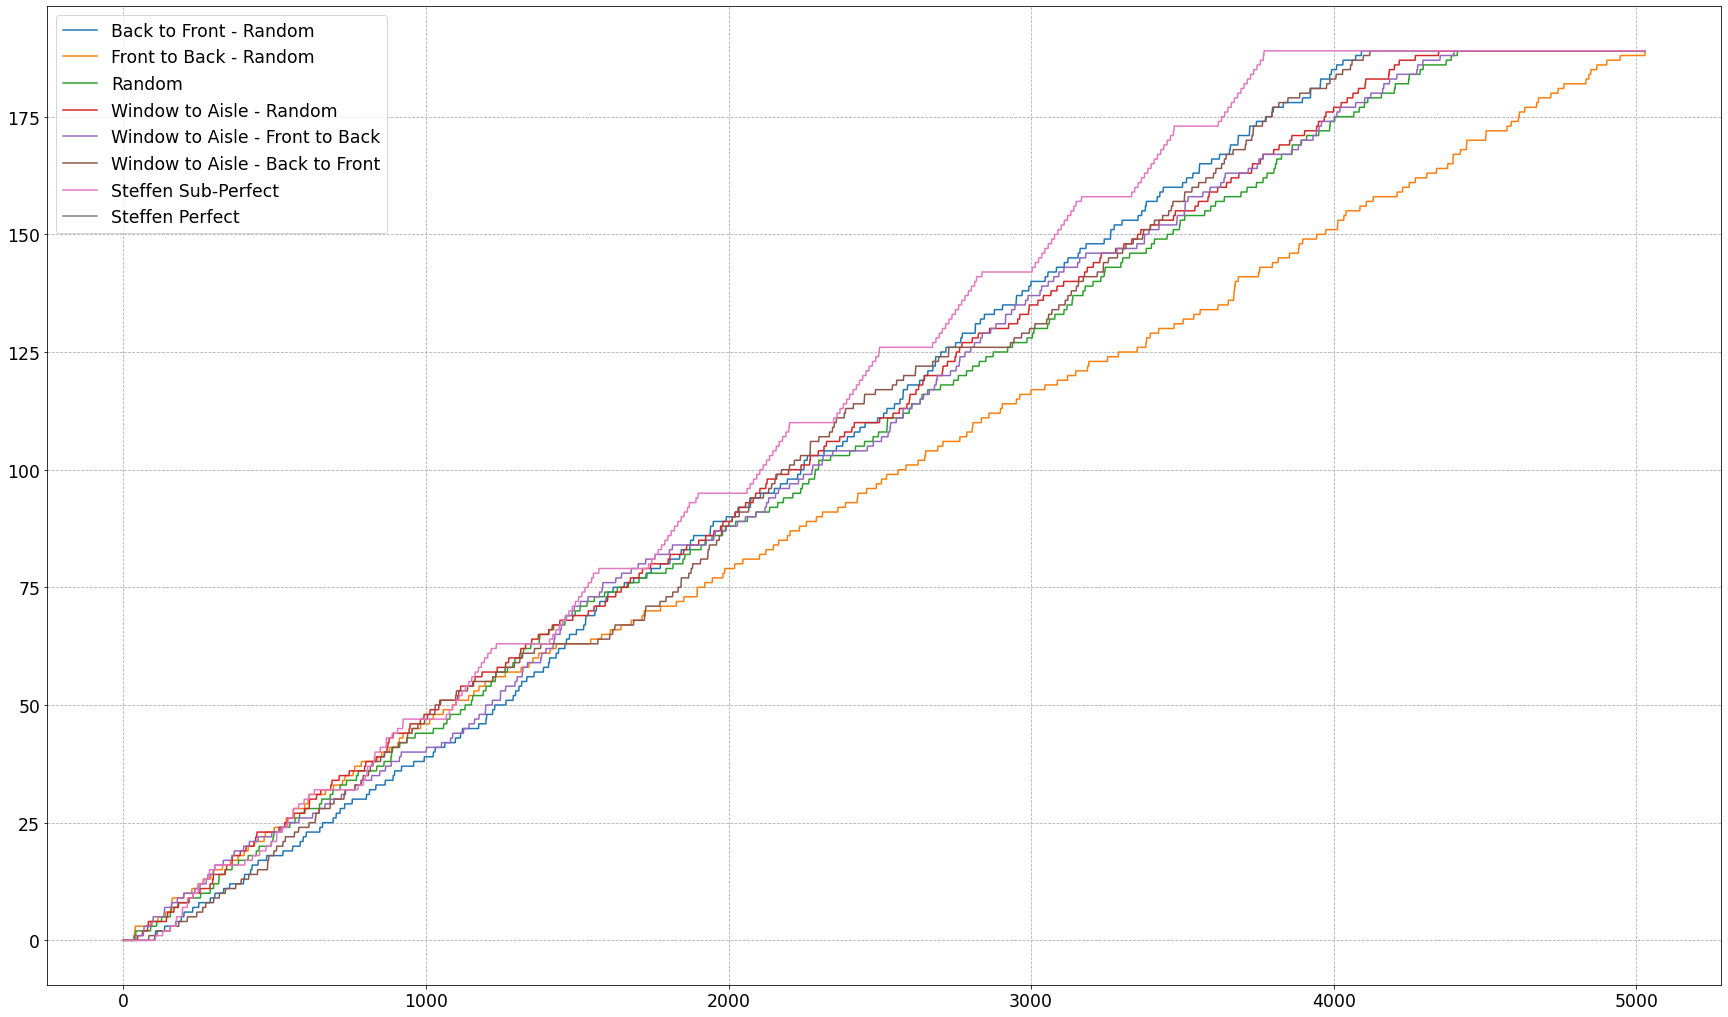

<Figure size 432x288 with 0 Axes>

In [449]:
plt.figure(figsize = (30, 18))
plt.plot(timeStep, numberBoarded['back_to_front'], label = 'Back to Front - Random')
plt.plot(timeStep, numberBoarded['front_to_back'], label = 'Front to Back - Random')
plt.plot(timeStep, numberBoarded['random'], label = 'Random')
plt.plot(timeStep, numberBoarded['wma_random'], label = 'Window to Aisle - Random')
plt.plot(timeStep, numberBoarded['wma_ftb'], label = 'Window to Aisle - Front to Back')
plt.plot(timeStep, numberBoarded['wma_btf'], label = 'Window to Aisle - Back to Front')
# plt.plot(timeStep, numberBoarded['liset_perfect'], label = 'Liset Perfect')
plt.plot(timeStep, numberBoarded['steffen_sub_perfect'], label = 'Steffen Sub-Perfect')
plt.plot(timeStep, numberBoarded['steffen_perfect'], label = 'Steffen Perfect')
plt.grid(linestyle = '--')
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.xticks(fontsize = 'xx-large')
plt.yticks(fontsize = 'xx-large')
plt.show()
plt.clf()